# First things first: Understanding the Topic

Airbnb is an online market place for renting apartments, mostly for vacations. This marketplace connects people that want to rent out their privat apartments or homes and people who are searching for accommodations. It covers over 100.000 cities and 220 countries. Airbnb also provides several other offers that do not effect our work.
The datasets that are used in this analysis providing different information about Airbnb listings in Madrid. Let's have a look at the main dataset we want to use. But first we need to import necessary libaries for the data exploration and further machine learning algorithm. 

https://www.airbnb.com/d/howairbnbworks

# Importing the necessary libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Pre-processing

## Defining Data sources

In [14]:
URL_LISTINGS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/listings.csv"
URL_LISTINGS_DETAILED = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/listings.csv.gz"
URL_REVIEWS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/reviews.csv"
URL_REVIEWS_DETAILED = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/reviews.csv.gz"
URL_CALENDAR = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/calendar.csv.gz"
URL_NEIGHBOURHOODS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/neighbourhoods.csv"
URL_NEIGHBOURHOODS_GEO = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/neighbourhoods.geojson"

## Loading data sets into pandas

In [15]:
df_listings = pd.read_csv(URL_LISTINGS)
df_listings_detailed = pd.read_csv(URL_LISTINGS_DETAILED, compression='gzip')
# df_reviews = pd.read_csv(URL_REVIEWS)
# df_reviews_detailed = pd.read_csv(URL_REVIEWS_DETAILED, compression='gzip')
df_calendar = pd.read_csv(URL_CALENDAR, compression='gzip')
df_neighbourhoods = pd.read_csv(URL_NEIGHBOURHOODS)

In [16]:
dfc_listings = df_listings.copy()
dfc_listings_detailed = df_listings_detailed.copy()
#dfc_reviews = df_reviews.copy()
#dfc_reviews_detailed = df_reviews_detailed.copy()
dfc_calendar = df_calendar.copy()
dfc_neighbourhoods = df_neighbourhoods.copy()

## Data Exploration

Let's have a look at the dataset "df_listings". First of all we want to know the size, the columns and the type of the dataset.
You can see that there are 20352 listings in this dataset. For some variables there are missing values. For example the variable last_review only has 14474 Non-Null values. That means that only 71% of all observations including these values.

In [41]:
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,2020-09-20,0.59,1,90
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,31,4,33,2018-07-15,0.44,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,60,15,0,NaN,NaN,6,292
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,101,5,10,2020-03-01,0.14,1,88
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.58,1,358


In [17]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20352 entries, 0 to 20351
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20352 non-null  int64  
 1   name                            20349 non-null  object 
 2   host_id                         20352 non-null  int64  
 3   host_name                       20347 non-null  object 
 4   neighbourhood_group             20352 non-null  object 
 5   neighbourhood                   20352 non-null  object 
 6   latitude                        20352 non-null  float64
 7   longitude                       20352 non-null  float64
 8   room_type                       20352 non-null  object 
 9   price                           20352 non-null  int64  
 10  minimum_nights                  20352 non-null  int64  
 11  number_of_reviews               20352 non-null  int64  
 12  last_review                     

Secoundly a statistical description helps to give a feeling for the dataset. Here we only choose coloums for which this description makes sense. Since for now we do not want to know the statistical mean of the host_id or the coordinates (latitude and longitude).
Here you can already see that some of the observations are outliers (for example look at max minimum_nights). 

In [18]:
df_listings[['price','minimum_nights','number_of_reviews','calculated_host_listings_count', 'availability_365']].describe(include='all')

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000
mean,115.756732,6.120381,31.665537,11.183471,153.010711
std,354.502984,30.964229,63.130360,28.264229,149.119819
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000,1.000000,0.000000
50%,59.000000,2.000000,4.000000,2.000000,90.000000
75%,100.000000,3.000000,32.000000,7.000000,340.000000
max,9999.000000,1125.000000,678.000000,197.000000,365.000000


### Data Visualization

For exploring the data visual we will use histograms. Since they are suitable for a holistic view, where we can probe into the data for each attribute.


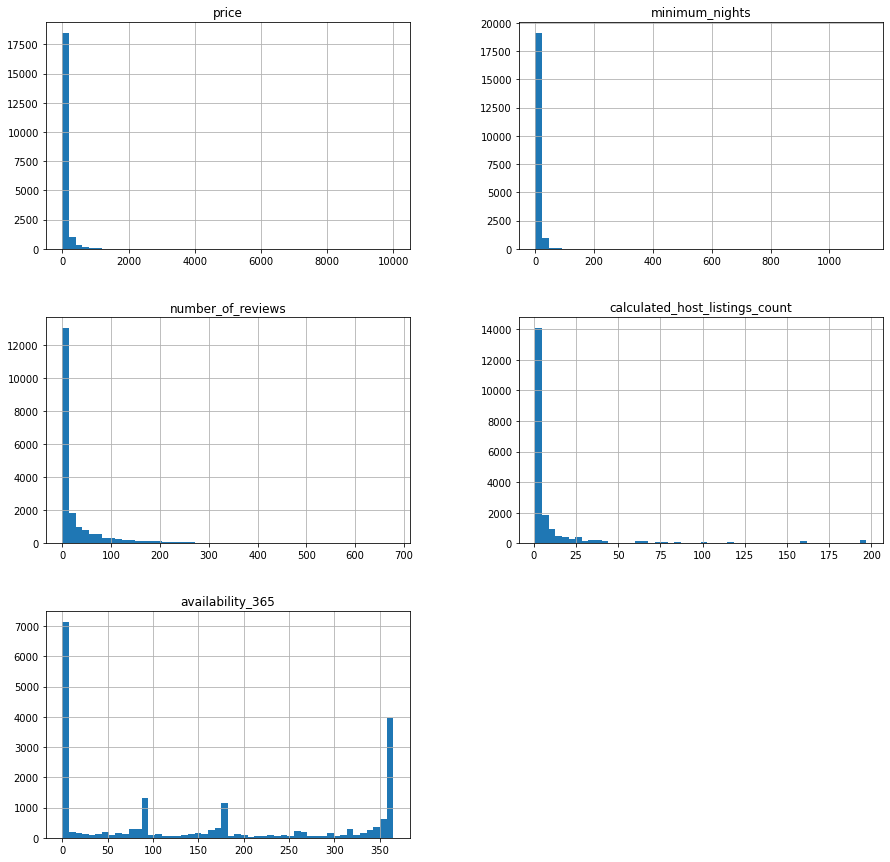

In [51]:
df_listings[['price','minimum_nights','number_of_reviews','calculated_host_listings_count', 'availability_365']].hist(bins=50, figsize=(15,15))
plt.show()

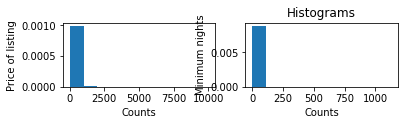

In [66]:
fig = plt.figure()
plt.subplot(3, 2, 1)
plt.hist(df_listings['price'], density=True)
plt.ylabel('Price of listing')
plt.xlabel('Counts')

plt.subplot(3, 2, 2)
plt.hist(df_listings['minimum_nights'], density=True)
plt.title('A tale of 2 subplots')
plt.ylabel('Minimum nights')
plt.xlabel('Counts')

plt.title("Histograms") 
plt.show()

## Outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8097,25226806,La Latina Experience,34129781,Javier,Centro,Palacio,40.41145,-3.71063,Entire home/apt,9999,1,9,2019-07-15,0.29,3,351
12125,34851930,Alaia Holidays duplex apartment at Gran Vía,106745942,Alaia,Centro,Justicia,40.42353,-3.70027,Entire home/apt,9999,1,6,2020-02-23,0.33,6,0
4099,16140561,Charming Chamberí - Cozy Attic in the Center,2203799,Lisa,Chamberí,Trafalgar,40.43338,-3.69893,Entire home/apt,9999,2,53,2019-09-30,1.12,1,76
2248,9440377,"1 MAGDALENA 38, QUIET AND CENTRAL",3746437,Nuria,Centro,Embajadores,40.41230,-3.69983,Entire home/apt,9200,1,11,2018-12-14,0.18,4,0
8814,27187514,habitacion por meses,6637077,Jesus,Latina,Puerta del Angel,40.41341,-3.72609,Private room,9000,800,0,NaN,NaN,2,365


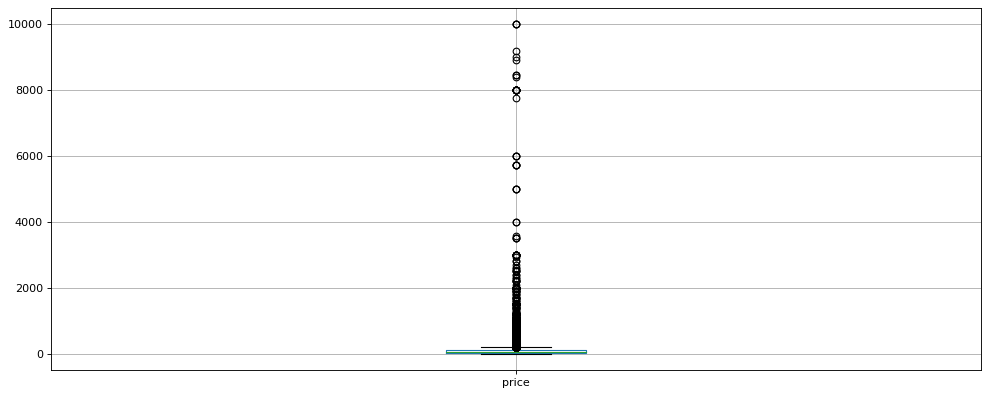

In [20]:
plt.figure(num = None, figsize=(15, 6), dpi=80)

dfc_listings.boxplot(column='price')
dfc_listings.sort_values(by=['price'], ascending = False).head()